In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft

ModuleNotFoundError: No module named 'jnp'

In [2]:
d = 20
N = int(1e4)
noise = 1.

## GENERATE SIGNAL
t = np.linspace(0, 2*np.pi, d+1)[:-1]
x = np.exp(4 * np.sin(t)) / 60

shift = np.random.randint(0, d, N)
y = np.vstack([np.roll(x, s) for s in shift])
y = y + np.random.randn(*y.shape) * noise

## FOURIER TRANSFORM
xfft = fft(x)
yfft = fft(y, axis=1)

# Moments
moments_fft = np.clip(np.mean(np.abs(yfft)**2, axis=0) - noise**2 * d, 0, None)
moments_true_fft = np.abs(xfft)

In [3]:
shift_rec = np.argmax(ifft(xfft * yfft.conj(), axis=1).real, axis=1)
y_shift = np.vstack([np.roll(y_i, s_i) for y_i, s_i in zip(y, shift_rec)])
x_rec = np.mean(y_shift, axis=0)

In [4]:
from multiprocessing import Pool, cpu_count
# check available cores

cpu_count()

64

In [5]:
from multiprocessing import Pool, cpu_count
d = 5
N = int(1e4)
noise = 2

## GENERATE SIGNAL
t = np.linspace(0, 2*np.pi, d+1)[:-1]
x = np.exp(4 * np.sin(t))
x = x / np.linalg.norm(x) * np.sqrt(d)

shift = np.random.randint(0, d, N)
y = np.vstack([np.roll(x, s) for s in shift])
y = y + np.random.randn(*y.shape) * noise

## FOURIER TRANSFORM
yfft = fft(y, axis=1)
xfft = fft(x)
#moments = np.abs(xfft)
moments = np.clip(np.mean(np.abs(yfft)**2, axis=0) - noise**2 * d, 0, None) ** 0.5
mean = np.mean(yfft[:, 0])

def get_angles(signal):
    fft_sig = fft(signal)
    return np.angle(fft_sig[1]), np.angle(fft_sig[2])

def create_signal(angle1, angle2):
    e1 = np.exp(1j * angle1)
    e2 = np.exp(1j * angle2)
    return np.array([mean,
     e1 * moments[1],
     e2 * moments[2],
     e2.conj() * moments[3],
     e1.conj() * moments[4]
     ])
    

def find_shift(xfft, yfft):
    return np.argmax(ifft(xfft * yfft.conj(), axis=1).real, axis=1)

def find_loss(x, yfft, ys):
    shift = find_shift(fft(x), yfft)
    y_shift = np.vstack([np.roll(y_i, s_i) for y_i, s_i in zip(ys, shift)])
    return np.mean((y_shift - x)**2)


angle1s, angle2s = np.meshgrid(np.linspace(0, 2*np.pi, 100), np.linspace(0, 2*np.pi, 100))

def loss(args):
    a1, a2 = args[0], args[1]
    return find_loss(ifft(create_signal(a1, a2)), yfft, y)

pool = Pool(cpu_count()//2)
losses = np.array(pool.map(loss, zip(angle1s.flatten(), angle2s.flatten()))).reshape(*angle1s.shape)
#losses = np.array([find_loss(ifft(create_signal(a1, a2)), yfft, y) for a1, a2 in zip(angle1s.flatten(), angle2s.flatten())]).reshape(*angle1s.shape)
#find_loss(x, yfft, y)

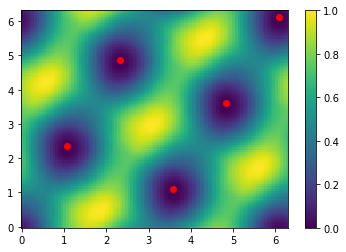

In [6]:
plt.pcolormesh(angle1s, angle2s, losses.real)
for s in range(5):
    x_roll = np.roll(x, s)
    angle1, angle2 = get_angles(x_roll)
    plt.scatter(angle1 % (2*np.pi), angle2 % (2*np.pi), c='r')
plt.colorbar()

Conclusion: At this noise level it's impossible to recover higher than frequency 2. NO WAY


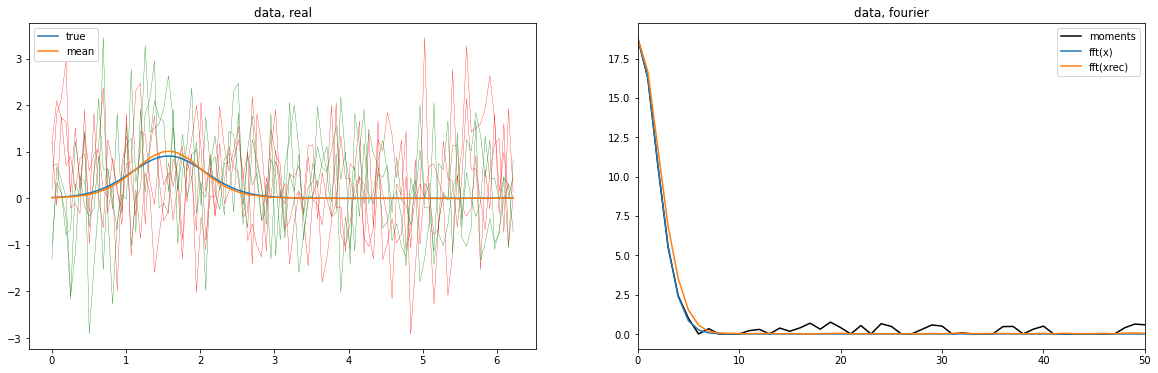

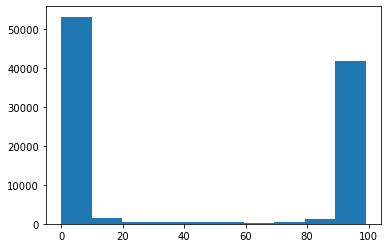

In [ ]:
## PLOT
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.title('data, real')
for i in range(3):
    plt.plot(t, y[i], color='red', linewidth=0.3)
    plt.plot(t, y_shift[i], color='green', linewidth=0.3)
plt.plot(t, x, label='true')
plt.plot(t, x_rec, label='mean')
plt.legend()

# fourier domain
plt.subplot(122)
plt.title('data, fourier')
plt.plot(moments_fft**0.5, 'black', label='moments')
for i in range(10):
    #plt.plot(np.abs(yfft[i]), color='red', linewidth=0.3)
    pass
plt.plot(np.abs(xfft), label='fft(x)')
plt.plot(np.abs(fft(x_rec)), label='fft(xrec)')
#plt.yscale('log')
plt.xlim([0, d//2])
#plt.ylim([1e-5, max(np.abs(moments_fft))])
plt.legend()

plt.figure()
#plt.plot(np.real(yfft[5]))
#plt.plot(np.imag(yfft[5]))
plt.hist((shift + shift_rec)%d)

print("Conclusion: At this noise level it's impossible to recover higher than frequency 2. NO WAY")

/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/emastr/anaconda3/envs/pimlenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


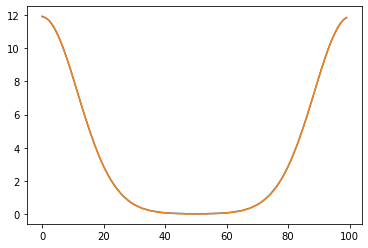

In [34]:
plt.plot(ifft(moments_fft))
plt.plot(ifft(moments_true**2))

plt.figure()
plt.

In [91]:
# Let's try anyway.
# The naive version is to just average out the shifted signals:

# Compute inner products:
#inner = xfft @ 
#units = inner / np.abs(inner)
inner

(2051.6267721024606+3.9022665781738703e-14j)